In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV,KFold,RepeatedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("german_credit_data.csv")
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Remove Index

In [ ]:
df.drop(columns = [df.columns[0]] ,  axis=1,  inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
print(df['Sex'].value_counts())

Sex
male      690
female    310
Name: count, dtype: int64


In [ ]:
print(df['Housing'].value_counts())

Housing
own     713
rent    179
free    108
Name: count, dtype: int64


In [ ]:
print(df['Saving accounts'].value_counts())

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


In [ ]:
print(df['Checking account'].value_counts())

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


In [ ]:
print(df['Purpose'].value_counts())

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [ ]:
print(df['Risk'].value_counts())

Risk
good    700
bad     300
Name: count, dtype: int64


In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna('No')
df['Checking account'] = df['Checking account'].fillna('No')

Binary category

In [ ]:
df['Sex'].replace(['male','female'], [1, 0], inplace=True)
df['Risk'].replace(['good','bad'], [1, 0], inplace=True)

Ordinal Encoding


In [ ]:
df['Saving accounts'].replace(['No','little','moderate','rich','quite rich'], [0,1,2,3,4], inplace=True)
df['Checking account'].replace(['No','little','moderate','rich'], [0,1,2,3], inplace=True)

One Hot

In [ ]:
df = pd.get_dummies(df, columns=["Housing","Purpose"], dtype=float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Sex                          1000 non-null   int64  
 2   Job                          1000 non-null   int64  
 3   Saving accounts              1000 non-null   int64  
 4   Checking account             1000 non-null   int64  
 5   Credit amount                1000 non-null   int64  
 6   Duration                     1000 non-null   int64  
 7   Risk                         1000 non-null   int64  
 8   Housing_free                 1000 non-null   float64
 9   Housing_own                  1000 non-null   float64
 10  Housing_rent                 1000 non-null   float64
 11  Purpose_business             1000 non-null   float64
 12  Purpose_car                  1000 non-null   float64
 13  Purpose_domestic ap

Remove Duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,35.546000,0.690000,1.904000,1.205000,1.001000,3271.258000,20.903000,0.700000,0.108000,0.713000,0.179000,0.097000,0.337000,0.01200,0.059000,0.181000,0.280000,0.022000,0.01200
std,11.375469,0.462725,0.653614,1.001988,0.957034,2822.736876,12.058814,0.458487,0.310536,0.452588,0.383544,0.296106,0.472921,0.10894,0.235743,0.385211,0.449224,0.146757,0.10894
min,19.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,0.000000,2.000000,1.000000,0.000000,1365.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,33.000000,1.000000,2.000000,1.000000,1.000000,2319.500000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,42.000000,1.000000,2.000000,1.000000,2.000000,3972.250000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000
max,75.000000,1.000000,3.000000,4.000000,3.000000,18424.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

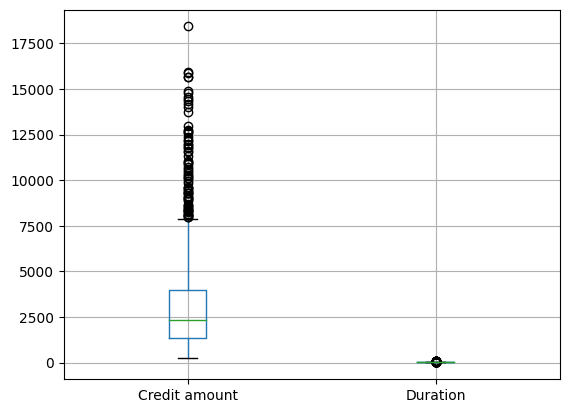

In [ ]:
df.boxplot(column=['Credit amount','Duration'])

Remove Outliers

In [ ]:
for x in ['Credit amount']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

for x in ['Duration']:
    q3,q1 = np.percentile(df.loc[:,x],[75,25])
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[x]<lower,x] = np.nan
    df.loc[df[x]>upper,x] = np.nan

print(df.isnull().sum())


Age                             0
Sex                             0
Job                             0
Saving accounts                 0
Checking account                0
Credit amount                  72
Duration                       70
Risk                            0
Housing_free                    0
Housing_own                     0
Housing_rent                    0
Purpose_business                0
Purpose_car                     0
Purpose_domestic appliances     0
Purpose_education               0
Purpose_furniture/equipment     0
Purpose_radio/TV                0
Purpose_repairs                 0
Purpose_vacation/others         0
dtype: int64


In [ ]:
df['Credit amount'].fillna((df['Credit amount'].mean()), inplace=True)
df['Duration'].fillna((df['Duration'].mean()), inplace=True)
print(df.isnull().sum())

Age                            0
Sex                            0
Job                            0
Saving accounts                0
Checking account               0
Credit amount                  0
Duration                       0
Risk                           0
Housing_free                   0
Housing_own                    0
Housing_rent                   0
Purpose_business               0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Sex                          1000 non-null   int64  
 2   Job                          1000 non-null   int64  
 3   Saving accounts              1000 non-null   int64  
 4   Checking account             1000 non-null   int64  
 5   Credit amount                1000 non-null   float64
 6   Duration                     1000 non-null   float64
 7   Risk                         1000 non-null   int64  
 8   Housing_free                 1000 non-null   float64
 9   Housing_own                  1000 non-null   float64
 10  Housing_rent                 1000 non-null   float64
 11  Purpose_business             1000 non-null   float64
 12  Purpose_car                  1000 non-null   float64
 13  Purpose_domestic ap

Correlation


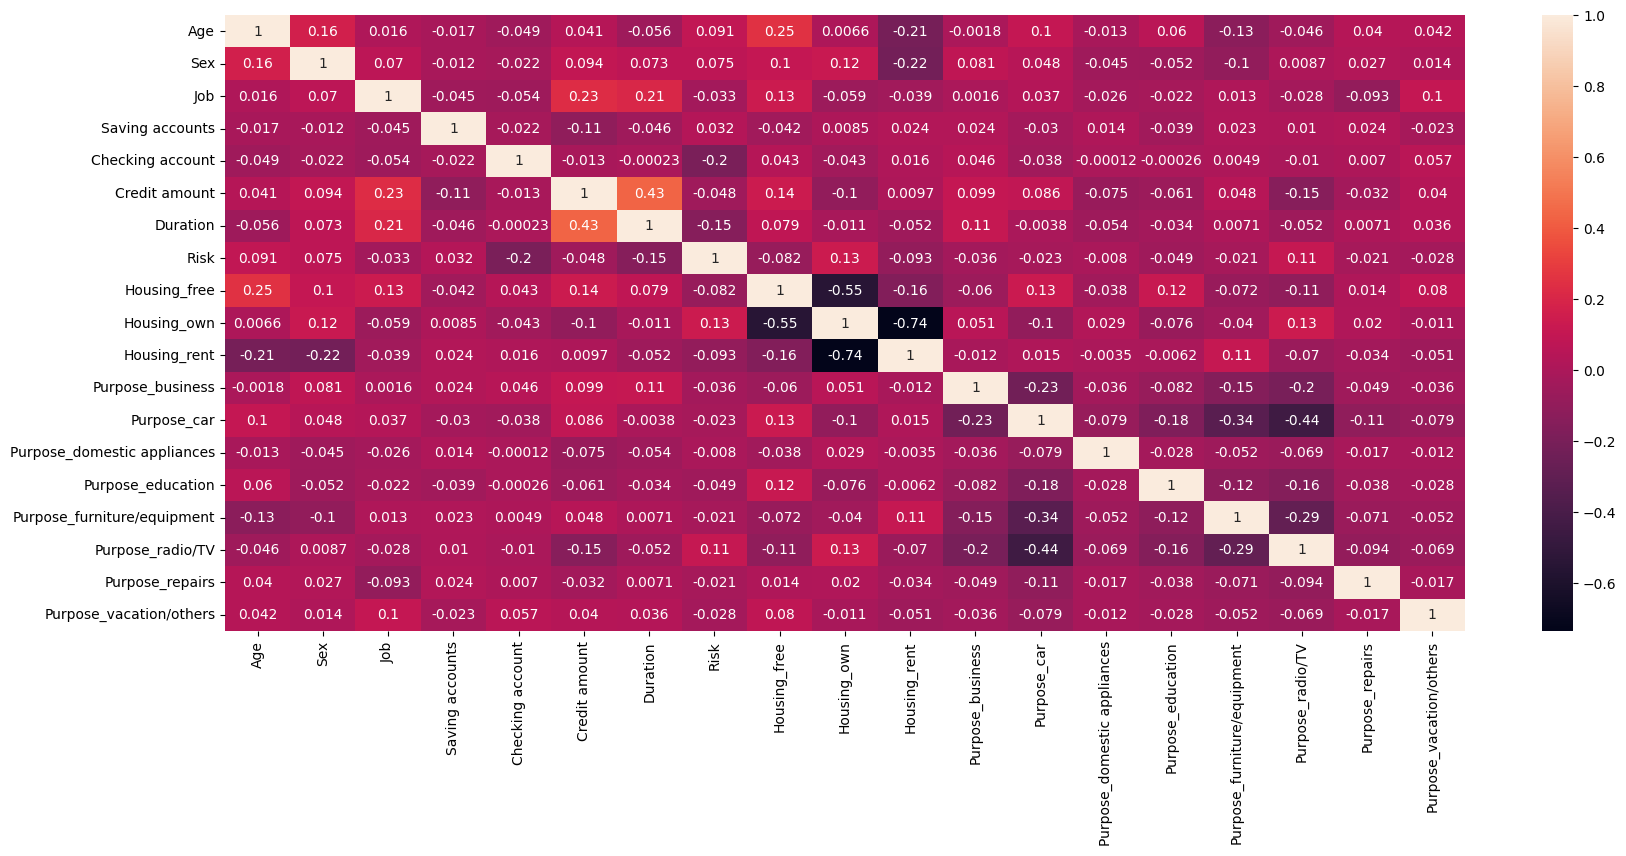

In [ ]:
plt.figure(figsize=(20, 8))
corr_map = sns.heatmap(df.corr(), annot=True)

In [ ]:
Y = df['Risk']
X = df.drop(['Risk'], axis=1)

In [ ]:
X.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,0,1,1169.0,6.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,0,2,1,2,5951.0,18.674194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,1,1,1,0,2096.0,12.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,1,2,1,1,7882.0,42.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,1,2,1,1,4870.0,24.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#X_train[["Credit amount","Duration"]] = scaler.fit_transform(X_train[["Credit amount","Duration"]])
#X_test[["Credit amount","Duration"]] = scaler.fit_transform(X_test[["Credit amount","Duration"]])
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

print(cf)

Accuracy: 72.67 %
Precision: 0.74
Recall: 0.95
F1-score: 0.83
[[ 15  71]
 [ 11 203]]


Fine Tuning

In [ ]:
#Cross validation
cv = KFold(n_splits=5,shuffle=True,random_state=1)
#Hyperparameter tuning
grid = dict()
grid['C'] = np.arange(0.01,5,0.1)
grid['penalty'] = ['l1','l2','elasticnet']
grid['solver']=['liblinear','saga','lbfgs']
search = GridSearchCV(LogisticRegression(),grid,cv=cv)
results = search.fit(X_train,Y_train)
print("Best parameters = ",results.best_params_,"\n")
model = LogisticRegression(**results.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters =  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'} 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [ ]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

print(cf)

Accuracy: 71.33 %
Precision: 0.71
Recall: 1.00
F1-score: 0.83
[[  0  86]
 [  0 214]]


In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

In [ ]:
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)

print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("F1-score: %.2f" % f1)

print(cf)

Accuracy: 71.00 %
Precision: 0.72
Recall: 0.98
F1-score: 0.83
[[  3  83]
 [  4 210]]
